# Exercise 1 Task 3

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Markdown, Math
plt.style.use("default")

# Task B

In [3]:
uni_samples = np.random.uniform(low=0,high=1,size=100)
normal_samples = np.random.normal(loc=0, scale=1, size=100)

# Task C
# 1. $\int_{-\infty}^{+\infty}e^{-x^2}x^2 dx=\frac{\sqrt\pi}{2} \approx 0.886226..$
# 2. $\int_{-\infty}^{+\infty}e^{-x^2}cos(x)dx=e^{-\frac{1}{4}}\sqrt\pi \approx 1.380388..$

In [5]:
# N Samples for each iteration if your computer cannot handlte the memory allcoation for very large vectors
# More iterations does not always mean a better result because you get lots of rounding errors due to floating point representation
# So my maximum precision is 10e-3 to 10e-4 percent
N, iterations = int(10e6), 10
area_sum1 = 0
area_sum2 = 0

for i in range (iterations):
    normal_samples = np.random.normal(loc=0, scale=1/np.sqrt(2), size=N)
    area_sum1 += 1/N*np.sqrt(np.pi)*np.sum(np.square(normal_samples))
    area_sum2 += 1/N*np.sqrt(np.pi)*np.sum(np.cos(normal_samples))

area_sum1 = area_sum1/iterations
area_sum2 = area_sum2/iterations

area_real1 = np.sqrt(np.pi)/2 
area_real2 = np.exp(-1/4)*np.sqrt(np.pi)


print("Summation 1. Function")
print(f"Computed area {area_sum1} \nReal Area: {area_real1}")
print(f"Percentual Difference {np.abs((1-(area_sum1/area_real1))*100):.3e} %")

print("\nSummation 2. Function")
print(f"Computed area {area_sum2} \nReal Area: {area_real2}")
print(f"Percentual Difference {np.abs((1-(area_sum2/area_real2))*100):.3e} %")


Summation 1. Function
Computed area 0.8862669397919699 
Real Area: 0.8862269254527579
Percentual Difference 4.515e-03 %

Summation 2. Function
Computed area 1.380369896515837 
Real Area: 1.380388447043143
Percentual Difference 1.344e-03 %


# Best One I got
# N=10e6, iterations=300, time= 226s
Summation 1. Function<br />
Computed area 0.8861974541418692<br /> 
Real Area: 0.8862269254527579<br />
Percentual Difference 3.325e-03 %<br />
<br />
Summation 2. Function<br />
Computed area 1.3803996028307073<br /> 
Real Area: 1.380388447043143<br />
Percentual Difference 8.082e-04 %<br />

# Task D
# Yes, you could infer the analytical solution. We could just compute the sum $\frac{1}{N}\sum_{n=1}^{N} x_n^2$ without $\sqrt{\pi}$ and look at the number and see that this number is strangely close to $\frac{1}{2}$ and therefore the analytical solution $\textit{should}$ be $\frac{\sqrt{\pi}}{2}$


In [30]:
N, iterations = int(10e6), 20
area_sum1 = 0

for i in range (iterations):
    normal_samples = np.random.normal(loc=0, scale=1/np.sqrt(2), size=N)
    area_sum1 += 1/N*np.sum(np.square(normal_samples))

area_sum1 = 1/iterations * area_sum1
display(Math(r'Computed\ the\ sum\ without\ \sqrt\pi: {} \approx \frac{{1}}{{2}}'.format(area_sum1)))

<IPython.core.display.Math object>

# Plot of both curves

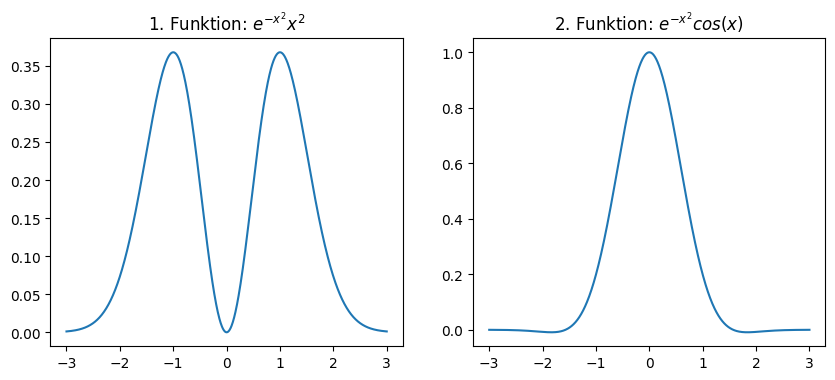

In [7]:
def func_1(x):
    return np.exp(-np.square(x))*np.square(x)

def func_2(x):
    return np.exp(-np.square(x))*np.cos(x)

x = np.linspace(-3,3,1000)
y1 = func_1(x)  
y2 = func_2(x)  

fig, ax = plt.subplots(1,2,figsize=(10,4))

ax[0].plot(x,y1)
ax[0].set_title("1. Funktion: $e^{-x^2}x^2$")

ax[1].plot(x,y2)
ax[1].set_title("2. Funktion: $e^{-x^2}cos(x)$")
plt.show()